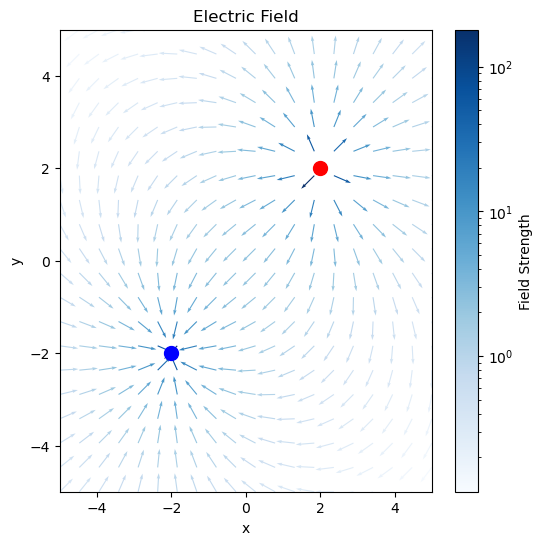

In [1]:
%display latex

import numpy as np
import matplotlib.pyplot as plt

def electric_field(x, y, charges):
    """
    Docstring goes here
    """
    Ex, Ey = np.zeros_like(x), np.zeros_like(y)
    k = 8.99e9  # Coulomb's constant in N·m²/C²

    for (xq, yq, q) in charges:
        dx, dy = x - xq, y - yq
        r = np.linalg.norm([dx, dy], axis=0)
        r3 = r**3
        Ex += k * q * dx / r3
        Ey += k * q * dy / r3

    return Ex, Ey


def plot_field(charges, grid_size=20, normalize=True):
    x = np.linspace(-5, 5, grid_size)
    y = np.linspace(-5, 5, grid_size)
    X, Y = np.meshgrid(x, y)

    Ex, Ey = electric_field(X, Y, charges)
    magnitude = np.sqrt(Ex**2 + Ey**2)

    if normalize:
        Ex /= magnitude
        Ey /= magnitude

    plt.figure(figsize=(6, 6))
    plt.quiver(X, Y, Ex, Ey, magnitude, cmap='Blues', scale=20, norm='log')
    plt.colorbar(label='Field Strength')

    for (xq, yq, q) in charges:
        plt.scatter(xq, yq, c='red' if q > 0 else 'blue', s=100)

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Electric Field')
    plt.show()

# Example charges: (x, y, charge)
charges = [(2, 2, 1e-9), (-2, -2, -1e-9)]
plot_field(charges)


In [13]:
%display latex
from sage import all
from sage.plot.plot3d.shapes import Torus
from sage.plot.plot3d.parametric_surface import ParametricSurface

import numpy as np
np.random.seed(1_618_033_988)

from functools import reduce

# Cartesian coordinates
x,y,z = var('x y z')

ε_0 = 8.8541878188e-12      # dielectric permittivity of vacuum
𝛋 = 1. / (4 * np.pi * ε_0)  # Coulomb's constant in [ N·m²/C² ]
Q = 1                       # total charge in [ C ]

h = 1e-1                    # eval grid step-size
n = 1e3                     # number of vertices on surface triangularization of the geometry to sample

E = lambda _x, _y, _z, _dq, _chrgs: reduce(
    lambda a,b: simplify(a+b),                              # Accumulator on symbolic vector-valued representation
    [
        ((𝛋 * _dq) / (u.norm())^2) * u.normalized()         # Coulomb's Law
        if u.norm() > 0 else 0                              # protect against NaN or Div by 0
        for u in [ 
            vector([_x,_y,_z]) - vector([dq_x, dq_y, dq_z]) # position vector displacements
            for (dq_x, dq_y, dq_z) in _chrgs
        ]
    ]
)

geom = Torus(0.8, 0.2, plot_points=n)
geom.triangulate()

vtx = geom.vertex_list()
charges = [vtx[_] for _ in np.random.randint(len(vtx), size=[Integer(n)])]

p = plot_vector_field3d(
    ( 
       lambda x, y, z: E(_x=x, _y=y, _z=z, _dq=(Q/n), _chrgs=charges)[0],    # x-component
       lambda x, y, z: E(_x=x, _y=y, _z=z, _dq=(Q/n), _chrgs=charges)[1],    # y-component
       lambda x, y, z: E(_x=x, _y=y, _z=z, _dq=(Q/n), _chrgs=charges)[2],    # z-component
    ),
    (x,-2,2), (y,-2,2), (z,-1,1), 
    center_arrows=True,
    plot_points=[7, 7, 7]
)
show(p + geom, viewer='threejs')


Graphics3d Object